# Discovery and Learning with Big Data/Machine Learning 

## Drew Murray 

## Machine Learning Supervised: KNN 

## Supervised Learning Workflow

## K-Nearest Neighbors (KNN)
- The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised - machine learning algorithm that can be used to solve both classification and - - regression problems.
- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. You may have heard the old adage, - “Birds of a feather flock together.”
- An object is classified by a majority vote of its neighbors with the new object being assigned to the class most common among its k nearest neighbors.
- K is a positive integer, typically small: k = 3, 5, or 10.
- KNN can do multiple (more than two) class predictions.
- In binary (two-class) classification problems, it is helpful to choose k to be an odd number as this can avoid a tie vote.

## Import Python Libraries: Numpy, Pandas, Matplotlib, and sklearn  

In [2]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

Pandas is imported to use the Dataframe data structure for data analysis, Numpy is imported to perform mathematical operations on arrays

In [3]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

The scatter_matrix() is imported from pandas and pyplot from matplotlib is imported for data visualization in order to understand the data better. 

In [4]:
# Import scikit-Learn module for the algorithm/modeL: Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

The KNeighborsClassifier() function is imported from the scikit library subsection, neighbors, this is the function that is used to perform the KNN in python. 

In [5]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

The train_test_split() function is imported from the sci-kit learn subsection, model_selection. This will split the values of the predictor variables and response variable into a test and training subset. 

In [6]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Kfold() will split the data into folds where each fold will play the testing role, the rest of the data will be the training.   and cross_val_score() will compute the performance of the difference between response variable and the predicted response variable, these are imported from the scikit subsection, model_selection. These 2 functions will be used to assess the performance of the algorithm by conducting k-fold cross validation. 

In [7]:
# Import scikit-Learn module classification report to later use for information about how the system try to classify / lable each record
from sklearn.metrics import classification_report

The classification_report() function from the scikit learn subset, metrics, will be outputted. This function will output the coefficients and other details that determine how well the model classified the observations. 

## Description Iris Dataset
Data Set: Iris.csv Title: Iris Plants Database Updated Sept 21 by C. Blake -Added discrepancy information Sources:

- Creator: RA_ Fisher
- Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
- Date: 1988
Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Predicted attribute: class of iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric, predictive attributes and the class Attribute Information:

- 1.sepal length in cm
- 2.sepal width in cm
- 3.petal length in cm
- 4.petal width in cm
- 5.class:

## Load Iris Dataset

In [8]:
# Specify location of the dataset
filename = 'C:/Users/dgmur/OneDrive/Desktop/ADTA 5340 Discovery and Learning with Big Data/Iris.csv'
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

The filepath for the iris csv dataset is assigned to filename. Then pd.read_csv() containing filename will convert the csv file into a dataframe. This is then assigned to df. 

## Preprocess the Dataset: Clean Data: Find & Mark Missing Values

In [9]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


df followed by a nested list that contain names of the numerical variables of df in string form, this is followed by the replace() function where 0 and then np.NaN is inside. This is assigned to df followed by a nested list containing the names of the  numerical variables in df and then a slash. What this does is replace all the NaN values with 0s for all of the numerical variables in df. Lastly, df.isnull() followed sum() will output the number of NaN values in each variable of df. 

In [10]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)

(150, 6)


The dimensions of df (rows and columns) will be outputted by printing the df.shape() function.

In [11]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


The data types of each variable of df will be outputted by printing df.dtypes function. 

In [12]:
#return the first five records / rows of the data set
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


The print function containing df.head(5) will output the first 5 rows of df.  

In [13]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


The print function containing the df.describe() function will output the descriptive statistics of each numerical variable of df. This includes the count, mean, std, minimum, 25% quartile, median, 75% quartile and maximum. 

In [14]:
#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


The amount of observation based on the levels of the variable, Species, in df is outputted by printing the df.group('Species') followed by size(). 

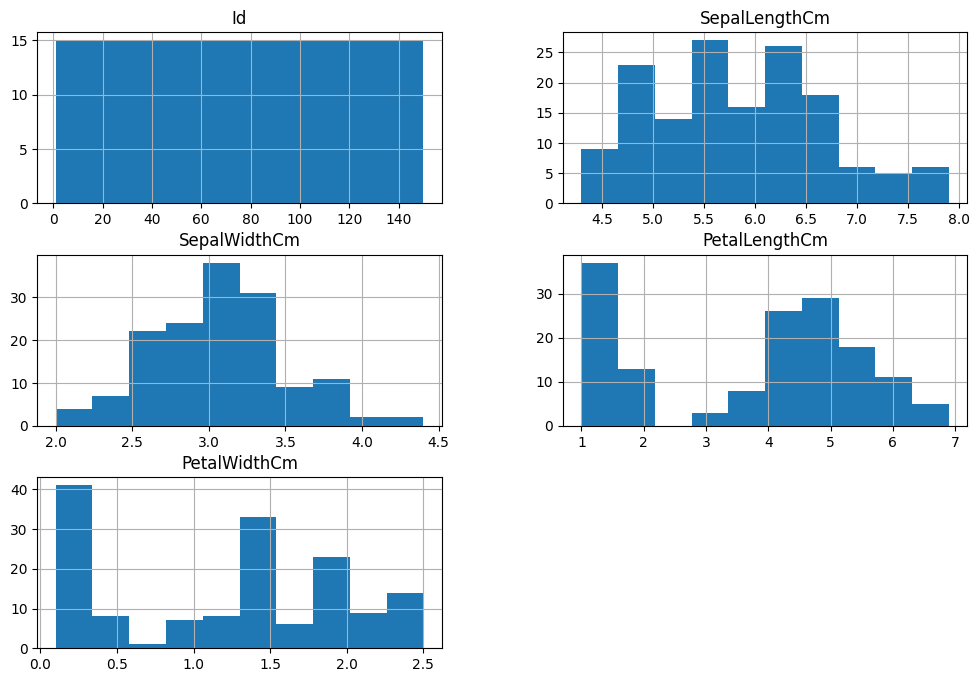

In [15]:
#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

df.hist() where the figsize is equal to (12,8) inside the parentheses() will create a histogram for each numerical variable of df where the figure size has a value of 12x8. The histograms are outputted by using the pyplot.show() function. 

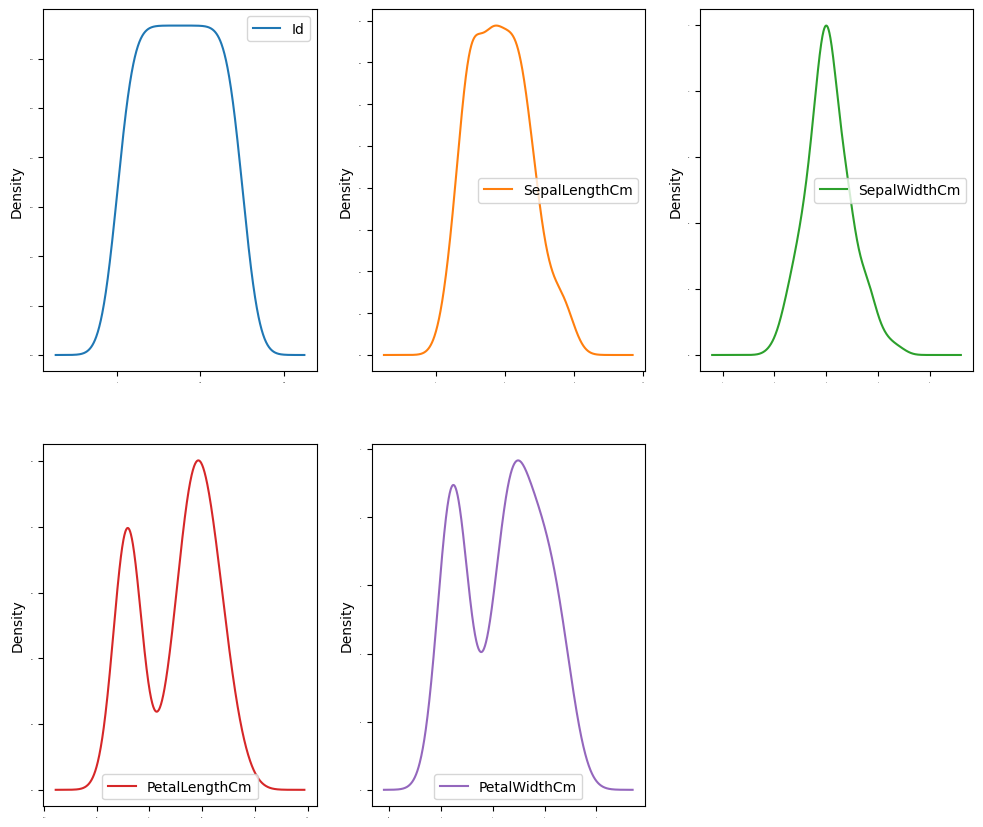

In [16]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

df.plot() where kind is specified to density, subplot specified to true, layout is equal to (3,3), sharex is specified to False, legend is specified to True, fontsize is specified to 1, and figsize is equal to (12,16). This will create a density plot for each numerical variable df that has as 3x3 layout, where each plot has a figure size value of 12x16 with a fontsize of 1 and has a legend. The pyplot.show() will output the density plots. 

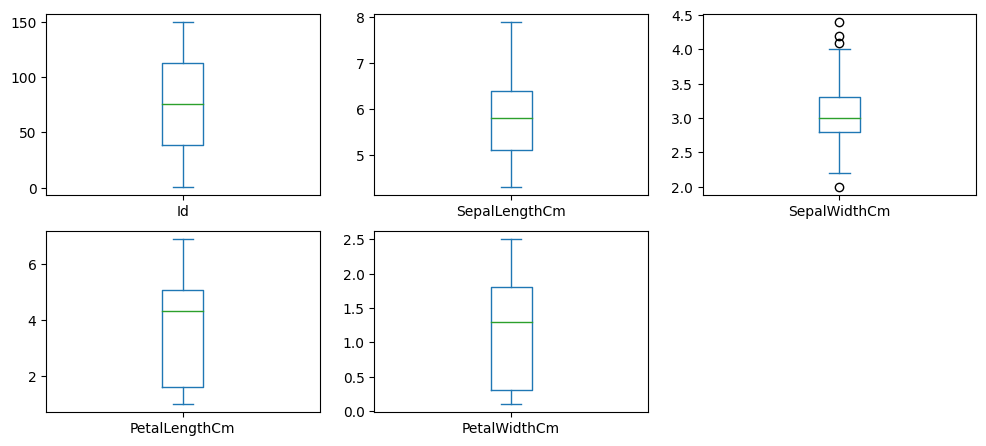

In [17]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

df.plot() where kind is specified to box, subplot specified to true, layout is equal to (3,3), sharex is specified to False, and figsize is equal to (12,8). This will create a box plot for each numerical variable of df that has as 3x3 layout, where each plot has a figure size value of 12x8. The pyplot.show() will output the box plots. 

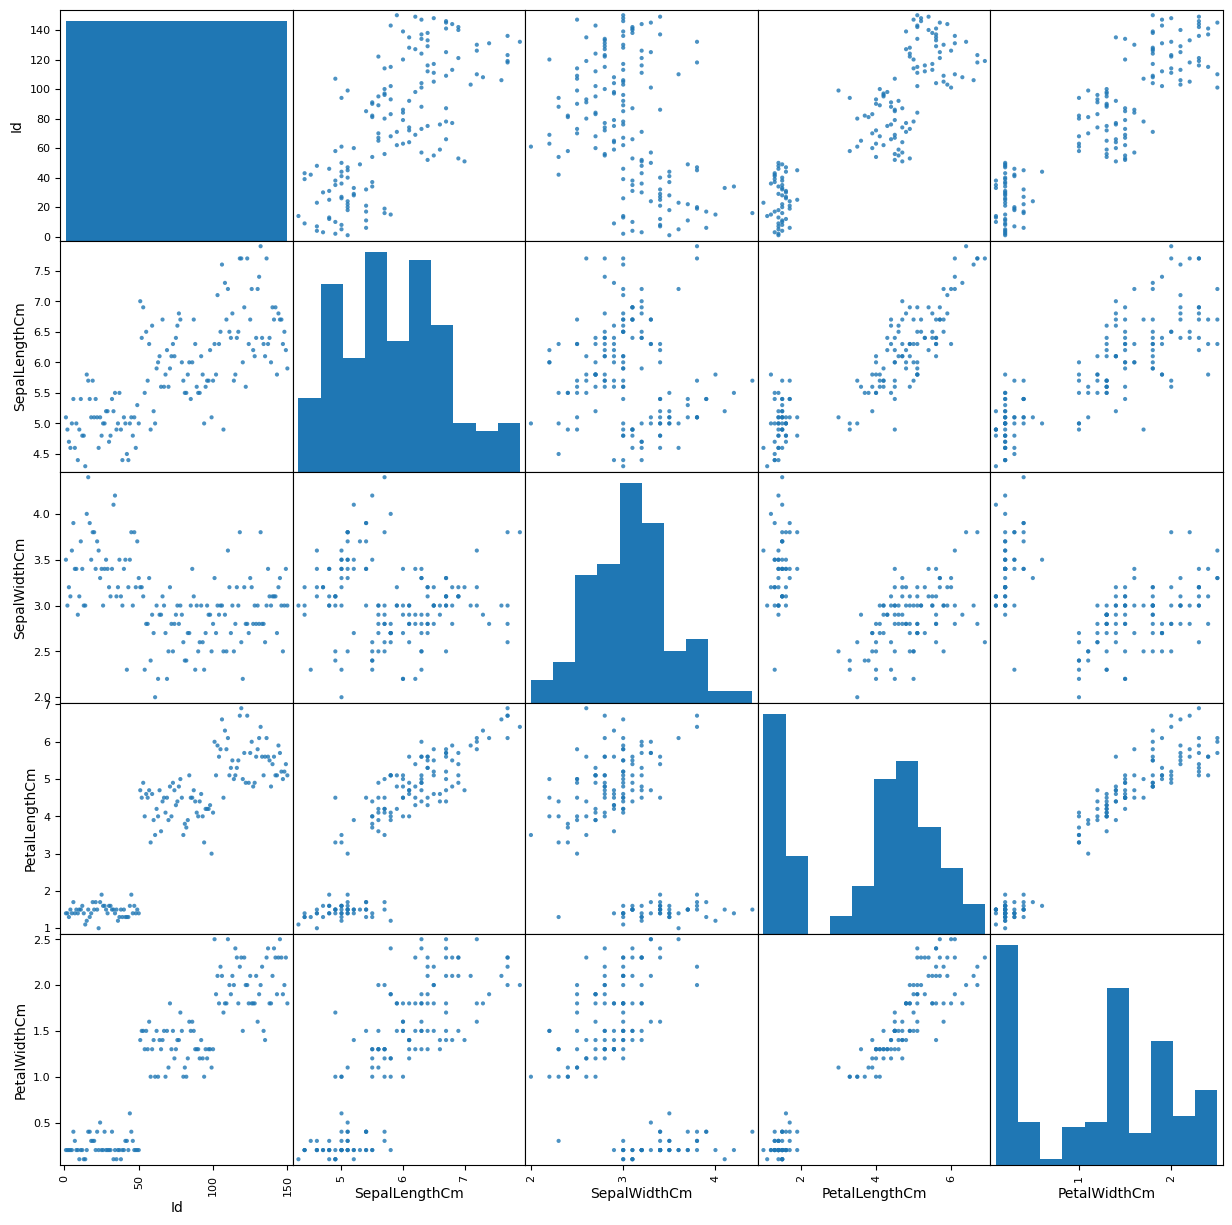

In [18]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

The scatter_matrix() containing df, followed by alpha specified to 0.8 and figsize equal to (15,15). This will create a scatter matrix for df where dots on the scatterplots have a transperency level of .8 and the figure size value is 15x15.The diagonal of the matrix are histograms. Then pyplot.show() function will output the scatterplot.  

## Separate Dataset into Input & Output NumPy Arrays

In [19]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

The values of df is converted to an array by using the df.values, this is assigned to a variable called, array. array is sliced where array will include all the rows of the variables of df from index 1 to but not including 5,these will be the predictor variables, this is assigned to X. Then array is sliced to only include all the rows from the column index position 5, this is the response variable, this is assigned to Y. 

## Split Input/Output Arrays into Training/Testing Datasets

In [20]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

0.33 is assigned to test_size, seed variable is used for replicability and debugging when randomizing, this is assigned the value 7. Then inside the train_test_split() function is X and Y followed by the test_size parameter specified to the variable, test_size and the random_state parameter specified to seed. This will create 67% training, 33% test split for X and Y, and this will be assigned to 4 variables, X_train, Y_train (67% of the data) X_test and Y_test (33% of the data). 

## Build and Train the Model
- Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
Precision = TP/TP+FP

- Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

- Recall = TP/TP+FN

- F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar costs. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 

- F1 Score = 2(Recall Precision) / (Recall + Precision)

In [21]:
#build the model
model = KNeighborsClassifier()
# train the model using the training sub-dataset
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.94      0.83      0.88        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



The KNeighborsClassifier() function is assigned to model, then the model.fit(X_train, Y_train) will train the KNN model with the training data. The model.predict(X_test) will predict the Y (response variables) based on the X (predictor variables) of the testing set based on the knowledge of fitting the training dataset, this is then assigned to predicted. The classification_report(Y_test, predicted) will compare the difference between the predicted Y and the Y of the testing dataset and then a classification report will be computed to display the difference which is assigned to report. Lastly, inside the print function, the text in between the quotations, "Classification Report:", followed by "\n" and "\n" and report. This will output "Classification Report:", and 2 lines will be skipped and then the report variable. 

## Score the Accuracy of the Model
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost the same. Therefore, you have to look at other parameters to evaluate the performance of your model. 

In [22]:
#score the accuracy level
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


The model.score(X_test,Y_test) will compute the accuracy of the KNN model using the test subset, this is assigned the results variable. Next inside the print function, and inside the parentheses, the text inside the quotations, "Accuracy" and the percentage sign, followed by 3 decimal floating point placeholder. Then the next set of parentheses the result time 100 will replace the placeholder when being outputted. 

## Classify/Predict the Model

In [23]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

The model.predict() where inside the function is a nested list containing all of the features for X, this will output the Y (response variable) based on the values of the features (predictor variables) in X. 

## Evaluate the model using the 10-fold cross-validation technique.


In [24]:
# evaluate the algorythm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
# In k-fold cross-validation, the original sample is randomly partitioned into k equal sized
#subsamples. Of the k subsamples, a single subsample is retained as the validation data for
#testing the model, and the remaining k − 1 subsamples are used as training data. The crossvalidation process is the#n repeated k times, with each of the k subsamples used exactly once as
#the validation data. The k results can then be averaged to produce a single estimation. The
#advantage of this method over repeated random sub-sampling is that all observations are used for
#both training and validation, and each observation is used for validation exactly once
kfold = KFold(n_splits, random_state=seed, shuffle=True)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'

# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.953 (0.052)


N_split is assigned a value of 10, seed is assigned the value 7 for replicability. Then, inside the Kfold() function is the nsplits, the random_state parameter specified to seed and shuffle specified to true, which will shuffle to dataset every time it splits during cross validation. Then this is assigned to the variable Kfold. This initiates the cross validation. Next, scoring is assigned the string, "accuracy". Next inside the cross_val_score() function is model, X,Y, followed by cv equalling to the Kfold variable and the scoring parameter equalling the scoring variable. The cross_val_score() function will use the KNN model and X and Y to compute the performance using accuracy. This will be assigned to results. Lastly, the text, "accuracy:", will be outputted along with the mean of results and std of results in 3 decimal long floating point format using the print function.   

Logistic Regression Accuracy: 0.967 (0.054)
KNN Accuracy: 0.953 (0.052)

Logistic Regression had a slightly higher accuracy score compared to KNN.

# Discovery and Learning with Big Data/Machine Learning

## Drew Murray

## Machine Learning Supervised CART Regression with Scikit-Learn: Overview
A decision tree builds regression or classification models in the form of a tree structure.

Regression trees are needed when the response variable is numeric or continuous.

In either case, the predictors or independent variables may be categorical or numeric. It is the target variable that determines the type of decision tree needed.

## Python: Scikit-Learn Library
The scikit-learn project started as scikit.learn, a Google Summer of Code project by David Cournapeau.

Its name stems from the notion that it is a "SciKit' (SciPy Toolkit), a separately developed and distributed third-party extension to SciPy.

The original codebase was later rewritten by other developers:

- In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort, and Vincent Michel, all from INRIA, took leadership of the project.
- They made the first public release on February the 1st 2010.
- As of 2018, scikit-learn is under active development.
Scikit-leam provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.

The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-leam.

This stack includes:

- NumPy: Base n-dimensional array package
- SciPy: Fundamental library for scientific computing
Matplotlib: Comprehensive 2D/3D plotting
- IPython: Enhanced interactive console
- Sympy: Symbolic mathematics
- Pandas: Data structures and analysis

## K-Fold Cross-Validation
In K Fold cross-validation, the data is divided into k subsets.

One of the k subsets is used as the test set/ validation set and the other k-l subsets are put together to form a training set.

The error estimation is averaged over all k trials to get the total effectiveness of our model.

## Negative Mean Squared Error (Negative MSE)
In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator ( a procedure for estimating an unobserved quantity) measures the average of the squares of the errors or deviation, i.e., the difference between the estimator and what is estimated.

MSE is a risk function, corresponding to the expected value of the squared error loss or quadratic loss.

The difference occurs because of randomness or because the estimator doesn't account for information that could produce a more accurate estimate.

The MSE is a measure of the quality of an estimator.

In the general case, it is non-negative, and values closer to zero are better.

IMPORTANT NOTES: In scikit-learn, mean squared error values are inverted, i.e., negative

## Data Set is the housing_boston.csv
We will investigate the Boston House Price dataset as you did with the linear regression homework. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- AA: 1000(AA -0:63)^2 where AA is the proportion of African Americans by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.
Note: For this assignment, we use a subset of the original dataset.

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- TAX: full-value property-tax rate per 10,000 dollars
- MEDV: Median value of owner-occupied homes in 1000 dollars.

## Import Libraries

In [25]:
# Import Python Libraries: NumPy and Pandas

import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import scit-Learn module for the algorithm/model: DecisionTreeRegressor

from sklearn. tree import DecisionTreeRegressor

# Import scikit-Learn module to split the dataset into train/ test sub-datasets

from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

- Pandas is imported to use the Dataframe data structure for data analysis, Numpy is imported to perform mathematical operations on arrays
- The scatter_matrix() is imported from pandas, pyplot from matplotlib is imported, and seaborn is imported for data visualization in order to understand the data better. 
- The DecisionTreeRegressor() function is imported from the scikit library subsection, tree, this is the function that is used to perform the decision tree regression in python. The decision tree regression is called because the response/y variable will be a continuous. 
- The train_test_split() function is imported from the sci-kit learn subsection, model_selection. This will split the values of the predictor variables and response variable into a test and training subset.
- Kfold() will split the data into folds where each fold will play the testing role, the rest of the data will be the training.   and cross_val_score() will compute the performance of the difference between reponse variable and the predicted response variable, will process the difference between the  are imported from the scikit subsection, model_selection. This will be used to assess the performance of the algorithm by conducting k-fold cross validation.

## Load Data

In [26]:
# Specify location of the dataset.  Be sure to  NOT  use the housing_boston_w_hdrs.csv!

housingfile = 'C:/Users/dgmur/OneDrive/Desktop/ADTA 5340 Discovery and Learning with Big Data/housing boston.csv' 

The filepath for the housing csv dataset is assigned to housingfile.

In [27]:
# Load the data into a Pandas DataFrame

df= pd.read_csv (housingfile, header=None)

 Then pd.read_csv() containing housingfile and the header parameter specified to none, This will convert the csv file into a dataframe, and then removed the names of the columns. This is then assigned to df. 

In [28]:
# Specify the fields with their names

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA',
'LSTAT', 'MEDV']

# Load the data into a Pandas DataFrame

df = pd.read_csv(housingfile, names=names)

A list of the strings is assigned to a variable called names. Then pd.read_csv() containing housingfile and the names parameter specified to the names variable, this will convert housingfile into a dataframe where the names of the columns are the list of strings from the names variable.

In [29]:
#  Look at the first 5 rows of data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The df.head() function will output the first 5 rows of df. 

## Preprocess the Dataset:
Clean Data: Find & Mark Missing Values

In [30]:
df.isnull().sum()

# We see there are no missing data points

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

df.isnull().sum() will output the total number missing/NaN values for each column of df. 

In [31]:
# Now let's say we want to decrease the amount of variables in our heatmap.  We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.

df2= df[['CRIM','INDUS', 'TAX','MEDV']]

# We will use df2 for the rest of the calculations.

df followed by a nested list containing a list of some of the names of the columns for df in string form, which is then assigned to the variable, df2. This will create a subset based on column names inside the nested list. 

## Performing the Exploratory Data Analysis (EDA)

In [32]:
# Get the number of records/rows, and the number of variables/columns 

print(df2.shape)

(452, 4)


The df2.shape() function will output the rows and columns of df2 using the print function.

In [33]:
# Get the data types of all variables

print(df2.dtypes)

CRIM     float64
INDUS    float64
TAX        int64
MEDV     float64
dtype: object


The df2.types function will output the data types for each column of df2 using the print function. 

In [34]:
# Obtain the summary statistics of the data

print(df2.describe())

             CRIM       INDUS         TAX        MEDV
count  452.000000  452.000000  452.000000  452.000000
mean     1.420825   10.304889  377.442478   23.750442
std      2.495894    6.797103  151.327573    8.808602
min      0.006320    0.460000  187.000000    6.300000
25%      0.069875    4.930000  276.750000   18.500000
50%      0.191030    8.140000  307.000000   21.950000
75%      1.211460   18.100000  411.000000   26.600000
max      9.966540   27.740000  711.000000   50.000000


The print function containing the df2.describe() function will output the descriptive statistics of each numerical variable of df2. This includes the count, mean, std, minimum, 25% quartile, median, 75% quartile and maximum.

## Create a Histogram

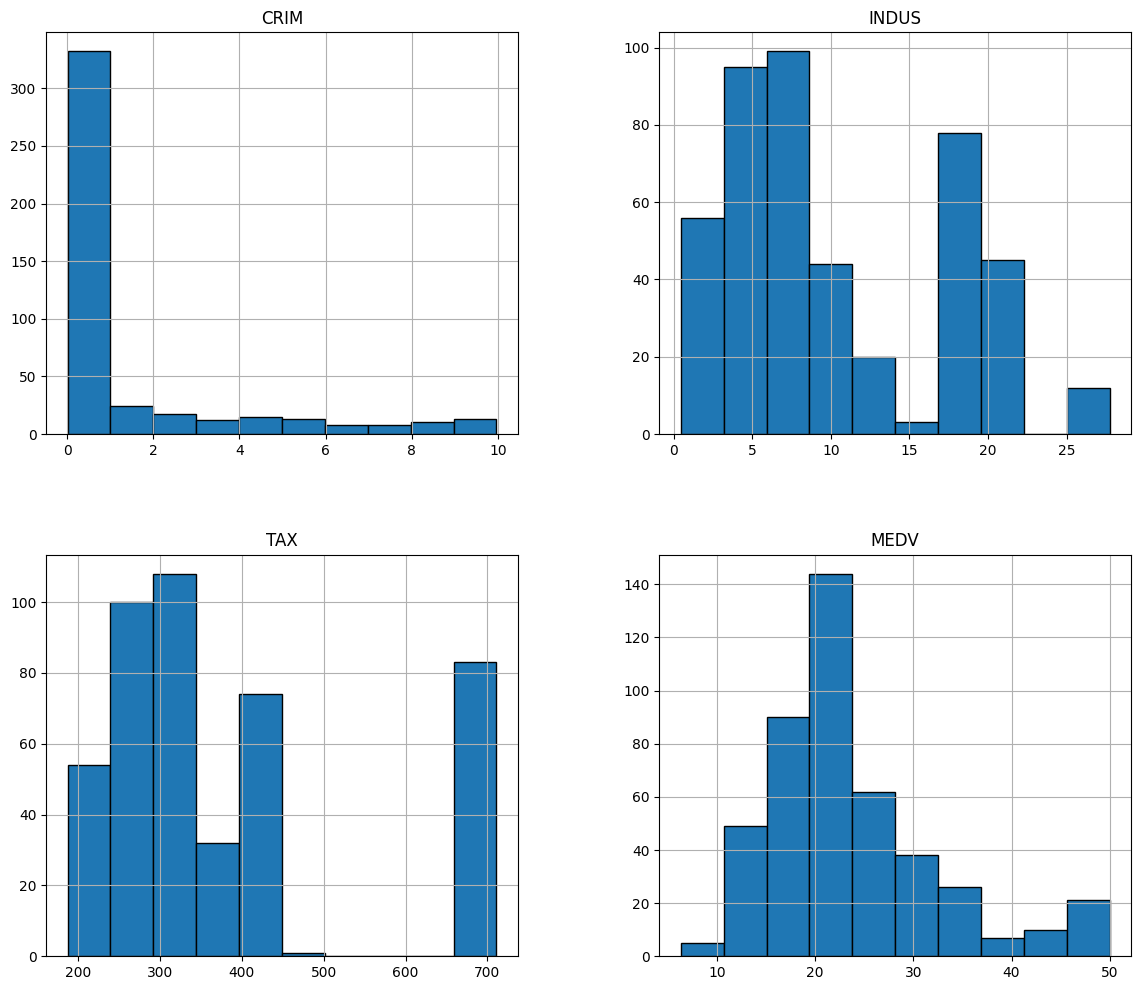

In [35]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.

df2.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

df2.hist() where the edgecolor is specified to black and the figsize is equal to (14,12) inside the parentheses. This will create a histogram for each numerical variable of df2 where the figure size has a value of 14x12 and each histogram is outlined in black. The histograms are outputted by using the plt.show() function.

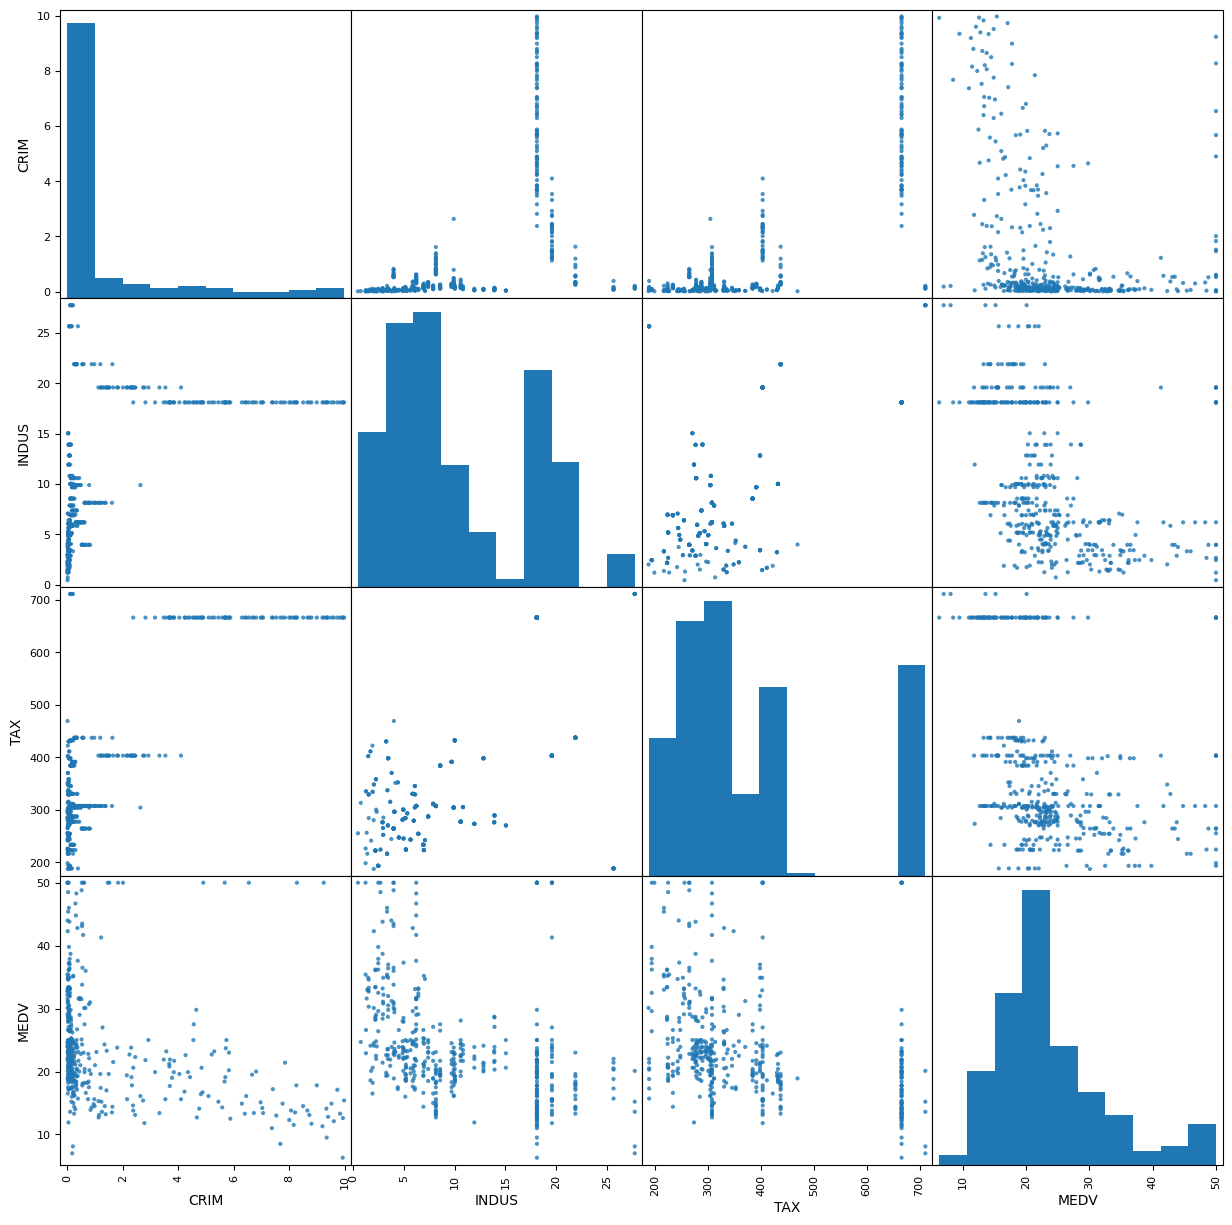

In [36]:
# Create scatter plot matrix

scatter_matrix(df2, alpha=0.8, figsize=(15, 15))
plt.show()

The scatter_matrix() containing df2, followed by alpha specified to 0.8 and figsize equal to (15,15). This will create a scatter matrix for df2 where dots on the scatterplots have a transperency level of .8 and the figure size value is 15x15. The diagonal are histograms. Then, plt.show() function will output the scatterplot.  

## Separate Dataset into Input & Output Arrays

In [37]:
# Store the dataframe values into a numPy array

array = df2.values

# Separate the array into input and output components by slicing (you used this in your Python fundamental homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3

X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (MEDV)

Y = array [:,3]

The values of df is converted to an array by using the df.values, this is assigned to a variable called, array. array is sliced where array will include all the rows of the variables of df from index 0 to but not including 3,these will be the predictor variables, this is assigned to X. Then array is sliced to only include all the rows from the column index position 3, this is the response variable, this is assigned to Y.

## Split into Input/Output Array into Training/Testing Datasets

In [38]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

0.33 is assigned to test_size, seed variable is used for replicability and this is assigned th e value 7. Then inside the train_test_split() function is X and Y followed by the test_size parameter specified to 0.2 and the random_state parameter specified to seed. This will create 80% training, 20% test split for X and Y, and this will be assigned to 4 variables, X_train, Y_train (80% of the data) X_test and Y_test (20% of the data). 

## Build and Train the Model

In [39]:
# Build the model

model = DecisionTreeRegressor(random_state=seed)

# Train the model using the training sub-dataset

model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept

model = DecisionTreeRegressor (criterion='friedman_mse', max_depth=None, max_features=None,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2,
min_samples_split=2, min_weight_fraction_leaf=0.0 , random_state=seed,
splitter='best')

model.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2,
                      random_state=7)

- The DecisionTreeRegressor() is called. Inside the function is the criterion parameter specified to friedman_mse, this will measure the quality of the split using mean squared error, followed by the max_depth parameter that is specified to none which will expand the tree until the reaches the specified value for min_samp_split, min_samp_split is 2, this will be the minimum number of samples required to split an internal node, and  min_samples_leaf is 2 in this case which is the minimum number of samples required for each node. Then for the max_features and max_leaf_nodes are specified to none, this is the default value for both parameters, the max number of nodes are unlimited and the max features will be depend on the number of of predictor variables being fitted in the model. The parameter min_impurity_decreases and min_weight_fraction_leaf are equal to 0 this will place no weight for each leaf node and a node will not split based on the value of impurity. Lastly, random_state is specified to the seed variable, and splitter is specified to best which will chose the best split at each node. This function is assigned to the variable model. 
- model.fit(X_train, Y_train) will fit the predictors and response variable to the decision regression tree using the training dataset. 


## Calculate R-squared

In [41]:
MSE = model.score(X_test, Y_test)
print('MSE = ', MSE)

MSE =  0.4303306408552299


Model.score(X_test, Y_test) will compute the means squared error by comparing using the testing dataset based on fitting the model using the training dataset. The results were be assigned to the variable MSE. Next the text, "MSE =" is outputted along with MSE variable.

## Model Prediction 

In [42]:
model.predict([[12,10,450]])


array([12.66666667])

The model.predict() function, will the response variable based on the values (predictors) in the nested list inside the parentheses. 

## We have now trained the model. Let’s use the trained model to predict the “Median value of owner-occupied homes in 1000 dollars” (MEDV).
We are using the following predictors for the 1st prediction:
- CRIM: per capita crime rate by town: 12
- INDUS: proportion of non-retail business acres per town: 10
- TAX: full-value property-tax rate per $10,000: 450

In [43]:
model.predict([[2,30,50]])

array([13.56666667])

The model.predict() function, will the response variable based on the values (predictors) in the nested list inside the parentheses. 

We are using the following predictors for the 2nd prediction:
- CRIM: per capita crime rate by town: 2
- INDUS: proportion of non-retail business acres per town: 30
- TAX: full-value property-tax rate per $10,000: 50

## Evaluate/Validate Algorithm/Model, Using K-Fold Cross-Validation

In [44]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -63.06023393719805


N_split is assigned a value of 10, seed is assigned the value 7 for replicability. Then, inside the Kfold() function is the nsplits, the random_state parameter specified to seed and shuffle specified to true, which will shuffle to dataset every time it splits during cross validation. Then this is assigned to the variable Kfold which will initiate the cross validation . Next scoring is assigned the string, "neg_mean_squared_error". Next inside the cross_val_score() function is model, X,Y, followed by cv equalling to the Kfold variable and the scoring parameter equalling the scoring variable. The cross_val_score() function will use the Decision tree regression model and X and Y to compute the performance using negative means square error. This will be assigned to results. Lastly, the text, ""Average of all results from the K-fold Cross Validation, using negative mean squared error:", will be outputted along with the mean of results and std of results in 3 decimal long floating point format using the print function.